<a href="https://colab.research.google.com/github/samarthya04/AI_Lab/blob/main/lab5_2205498.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluation Questions

1. Swap two elements in a list

In [42]:
def swap_elements(l, pos1, pos2):
  l[pos1], l[pos2] = l[pos2], l[pos1]
  return l

my_list = [1, 2, 3, 4, 5]
print(swap_elements(my_list, 1, 3))

[1, 4, 3, 2, 5]


2. Find the length of a list

In [43]:
my_list = [1, 2, 3, 4, 5]
length = len(my_list)
print(f"Length: {length}")

Length: 5


3. Check if element exists in a list

In [44]:
my_list = [1, 2, 3, 4, 5]
element = 3
if element in my_list:
  print(f"{element} exists in the list")

3 exists in the list


4. Clear a list

In [45]:
my_list = []

In [46]:
my_list.clear()

5. Reversing a list

In [47]:
my_list = [1, 2, 3, 4, 5]
my_list.reverse()
print(my_list)

[5, 4, 3, 2, 1]


6. Find sum of elements in a list

In [48]:
my_list = [1, 2, 3, 4, 5]
sum = 0
for element in my_list:
  sum += element
print(f"Sum: {sum}")

Sum: 15


7. Multiply all number in a list

In [49]:
my_list = [1, 2, 3, 4, 5]
prod = 1
for element in my_list:
  prod *= element
print(f"Product: {prod}")

Product: 120


8. Find smallest number in a list

In [50]:
my_list = [54, 23, 87, 12, 45]
min = my_list[0]
for element in my_list:
  if element < min:
    min = element
print(f"Smallest number: {min}")

Smallest number: 12


9. Find largest number in a list

In [51]:
my_list = [54, 23, 87, 12, 45]
max = my_list[0]
for element in my_list:
  if element > max:
    max = element
print(f"Largest number: {max}")

Largest number: 87


10. Find the second largest number in the list

In [52]:
my_list = [54, 23, 87, 12, 45]
max = my_list[0]
second_max = my_list[0]
for element in my_list:
  if element > max:
    second_max = max
    max = element
  elif element > second_max:
    second_max = element
print(f"Second largest number: {second_max}")

Second largest number: 54


# Lab Assessment

**Assignment 5:** A Search for a Puzzle Solver*

Objective: Solve the 8-puzzle using A* search.

Problem Statement: The 8-puzzle involves sliding tiles to achieve a goal state. Use A*to solve it.

Tasks:

Define heuristic functions:
- H1: Number of misplaced tiles.
- H2: Sum of Manhattan distances of all tiles from their goal positions.
- Implement A* with both heuristics.
- Compare the performance of the two heuristics in terms of the number of nodes
explored and solution depth.

In [53]:
import heapq
import numpy as np
from copy import deepcopy

In [54]:
def get_blank_pos(board):
    return [(i, row.index(0)) for i, row in enumerate(board) if 0 in row][0]

In [55]:
def generate_children(board):
    children = []
    x, y = get_blank_pos(board)
    moves = {'Up': (-1, 0), 'Down': (1, 0), 'Left': (0, -1), 'Right': (0, 1)}

    for move, (dx, dy) in moves.items():
        nx, ny = x + dx, y + dy
        if 0 <= nx < 3 and 0 <= ny < 3:
            new_board = deepcopy(board)
            new_board[x][y], new_board[nx][ny] = new_board[nx][ny], new_board[x][y]
            children.append((new_board, move))

    return children


In [56]:
def is_goal(board, goal):
    return board == goal

In [57]:
def get_path(parent_map, current):
    path = []
    while current in parent_map:
        current, move = parent_map[current]
        path.append(move)
    return path[::-1]

In [58]:
def misplaced_tiles(state, goal):
    return sum(1 for i in range(3) for j in range(3) if state[i][j] and state[i][j] != goal[i][j])

In [59]:
def misplaced_tiles(state, goal):
    count = 0
    for i in range(3):
        for j in range(3):
            if state[i][j] and state[i][j] != goal[i][j]:
                count += 1
    return count

In [60]:
def a_star(start, goal, heuristic):
    open_list, closed_set = [], set()
    heapq.heappush(open_list, (0, start, 0))
    parent_map = {}
    nodes_explored = 0

    while open_list:
        _, current, depth = heapq.heappop(open_list)
        nodes_explored += 1

        if is_goal(current, goal):
            return get_path(parent_map, tuple(map(tuple, current))), nodes_explored, depth

        closed_set.add(tuple(map(tuple, current)))

        for child, move in generate_children(current):
            child_tuple = tuple(map(tuple, child))
            if child_tuple in closed_set:
                continue
            parent_map[child_tuple] = (tuple(map(tuple, current)), move)
            h = heuristic(child, goal)
            heapq.heappush(open_list, (depth + h, child, depth + 1))

    return None, nodes_explored, -1

In [61]:
start_state = [
    [1, 2, 3],
    [4, 0, 5],
    [6, 7, 8]
    ]
goal_state = [
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 0]
    ]

path1, explored1, depth1 = a_star(start_state, goal_state, misplaced_tiles)
path2, explored2, depth2 = a_star(start_state, goal_state, manhattan_distance)

print("Using Misplaced Tiles:")
print("Solution Path:", path1)
print("Nodes Explored:", explored1)
print("Solution Depth:", depth1)

print("\nUsing Manhattan Distance:")
print("Solution Path:", path2)
print("Nodes Explored:", explored2)
print("Solution Depth:", depth2)

Using Misplaced Tiles:
Solution Path: ['Right', 'Down', 'Left', 'Left', 'Up', 'Right', 'Down', 'Right', 'Up', 'Left', 'Left', 'Down', 'Right', 'Right']
Nodes Explored: 248
Solution Depth: 14

Using Manhattan Distance:
Solution Path: ['Right', 'Down', 'Left', 'Left', 'Up', 'Right', 'Down', 'Right', 'Up', 'Left', 'Left', 'Down', 'Right', 'Right']
Nodes Explored: 88
Solution Depth: 14


**Assignment 6:** Path Planning for a Robot

Objective: Use A* Search to find an optimal path for a robot navigating a 2Dgrid.

Problem Statement: A robot must move from a start point to a goal in a grid whileavoiding obstacles.

Tasks:

Implement A* with:
- The Manhattan distance heuristic applies to grids without any diagonal movement.
- The Euclidean distance heuristic is applicable to grids that allowdiagonal
movement.
- Use a plotting library to visualize the found path.
- Compare A* with BFS and Uniform Cost Search.

In [62]:
import numpy as np
import heapq
import matplotlib.pyplot as plt
from collections import deque
import math

In [63]:
DIRECTIONS_4 = [(0, 1), (1, 0), (0, -1), (-1, 0)]
DIRECTIONS_8 = DIRECTIONS_4 + [(1, 1), (-1, -1), (1, -1), (-1, 1)]

In [64]:
def manhattan(p1, p2):
    return abs(p1[0] - p2[0]) + abs(p1[1] - p2[1])

def euclidean(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

In [65]:
def a_star(grid, start, goal, heuristic, allow_diagonal=False):
    rows, cols = grid.shape
    directions = DIRECTIONS_8 if allow_diagonal else DIRECTIONS_4
    open_list = []
    heapq.heappush(open_list, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            return reconstruct_path(came_from, current)

        for d in directions:
            neighbor = (current[0] + d[0], current[1] + d[1])
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                new_g = g_score[current] + (1 if not allow_diagonal else euclidean(current, neighbor))
                if neighbor not in g_score or new_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = new_g
                    f_score[neighbor] = new_g + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))
    return []

In [66]:
def bfs(grid, start, goal):
    rows, cols = grid.shape
    queue = deque([start])
    came_from = {start: None}

    while queue:
        current = queue.popleft()
        if current == goal:
            return reconstruct_path(came_from, current)

        for d in DIRECTIONS_4:
            neighbor = (current[0] + d[0], current[1] + d[1])
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0 and neighbor not in came_from:
                queue.append(neighbor)
                came_from[neighbor] = current
    return []


In [67]:
def ucs(grid, start, goal):
    rows, cols = grid.shape
    open_list = [(0, start)]
    came_from = {}
    cost = {start: 0}

    while open_list:
        current_cost, current = heapq.heappop(open_list)

        if current == goal:
            return reconstruct_path(came_from, current)

        for d in DIRECTIONS_4:
            neighbor = (current[0] + d[0], current[1] + d[1])
            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols and grid[neighbor] == 0:
                new_cost = current_cost + 1
                if neighbor not in cost or new_cost < cost[neighbor]:
                    cost[neighbor] = new_cost
                    came_from[neighbor] = current
                    heapq.heappush(open_list, (new_cost, neighbor))
    return []


In [68]:
def reconstruct_path(came_from, current):
    path = []
    while current in came_from:
        path.append(current)
        current = came_from[current]
    return path[::-1]

In [69]:
def plot_grid(grid, start, goal, path, title):
    plt.figure(figsize=(8, 8))
    plt.imshow(grid, cmap='gray_r')

    if path:
        for (x, y) in path:
            plt.scatter(y, x, c='blue', marker='o', s=50)

    plt.scatter(start[1], start[0], c='green', marker='o', s=100, label='Start')
    plt.scatter(goal[1], goal[0], c='red', marker='o', s=100, label='Goal')
    plt.legend()
    plt.title(title)
    plt.show()

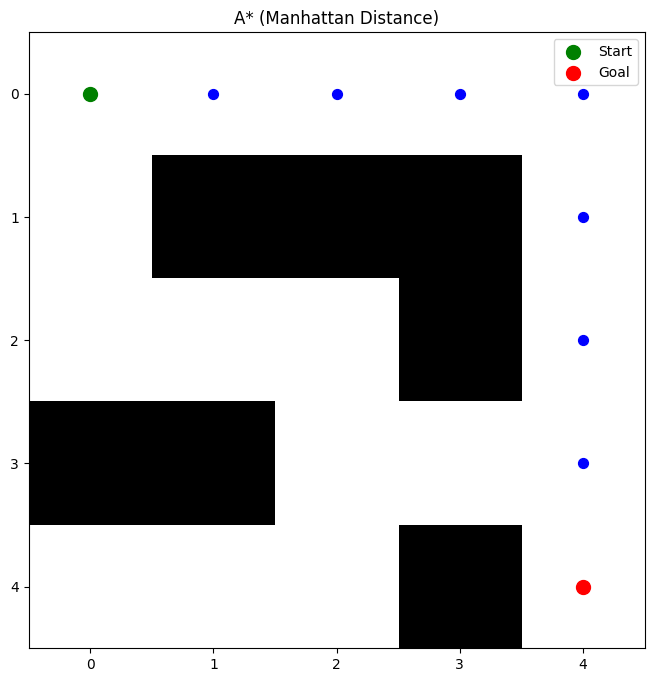

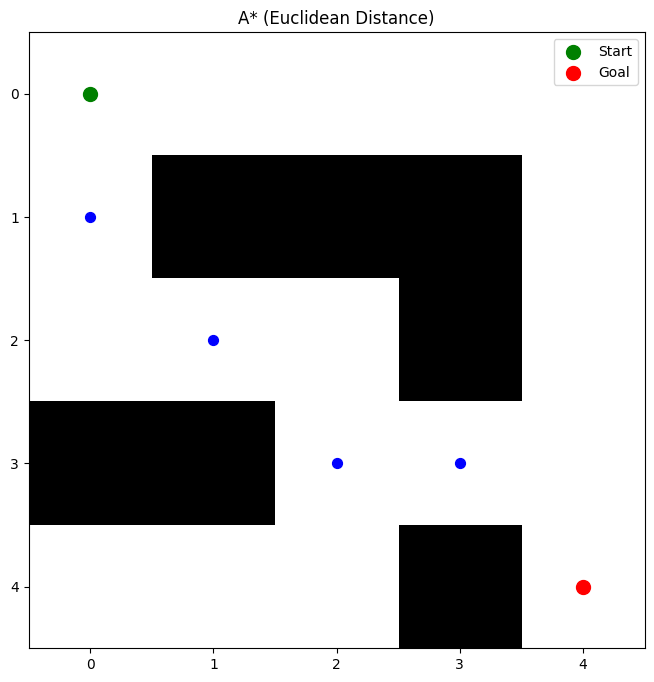

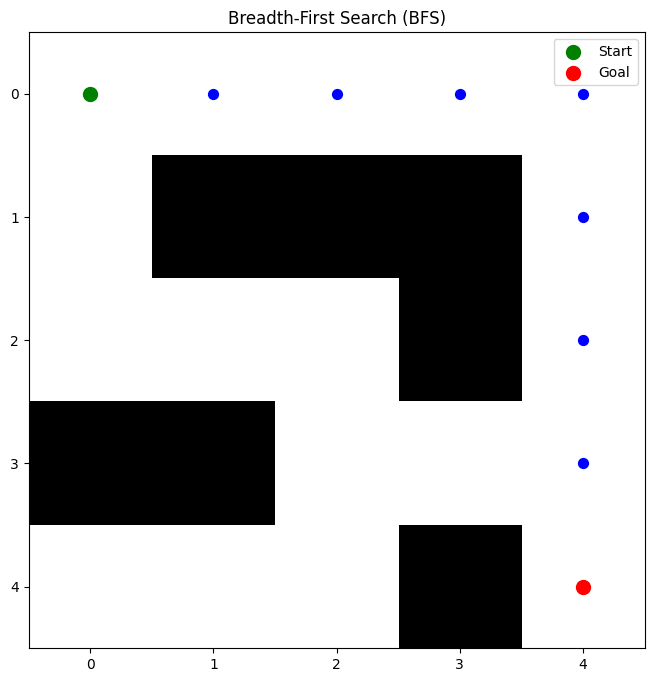

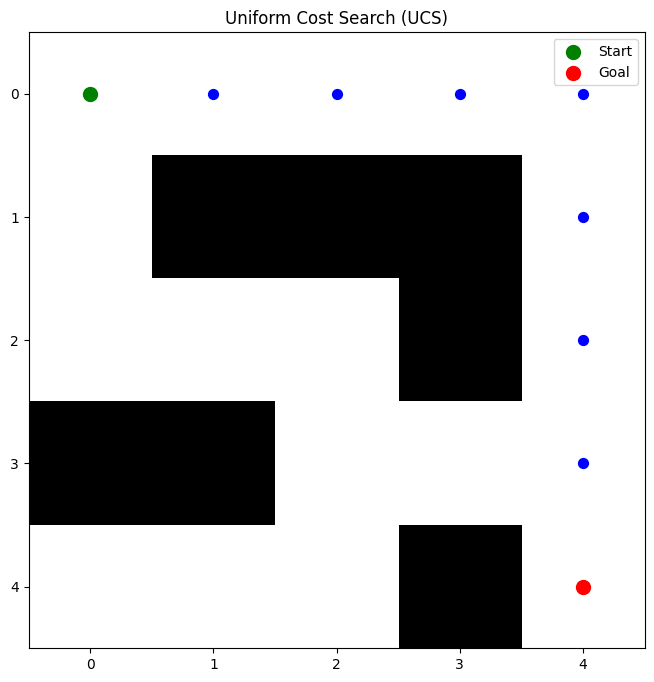

In [72]:
grid = np.array([
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 1, 0],
    [1, 1, 0, 0, 0],
    [0, 0, 0, 1, 0]
])

start = (0, 0)
goal = (4, 4)

path_astar_manhattan = a_star(grid, start, goal, manhattan, allow_diagonal=False)
plot_grid(grid, start, goal, path_astar_manhattan, 'A* (Manhattan Distance)')

path_astar_euclidean = a_star(grid, start, goal, euclidean, allow_diagonal=True)
plot_grid(grid, start, goal, path_astar_euclidean, 'A* (Euclidean Distance)')

path_bfs = bfs(grid, start, goal)
plot_grid(grid, start, goal, path_bfs, 'Breadth-First Search (BFS)')

path_ucs = ucs(grid, start, goal)
plot_grid(grid, start, goal, path_ucs, 'Uniform Cost Search (UCS)')
